In [7]:
# Blog source: https://xavierbourretsicotte.github.io/#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
def cost_function(X, y, theta):
    '''OLS cost function'''
    
    m = np.size(y) # number of samples
    
    h = X @ theta  # vectorized hypothesis
    
    J = float((1 / (2 * m)) * (h - y).T @ (h - y)) # OLS cost
    
    return J

def closed_form_solution(X, y):
    '''OLS normal equations'''
    
    return np.linalg.inv(X.T @ X) @ X.T @ y

def closed_form_reg_solution(X, y, lam=10):
    '''OLS normal equations with L2 regularization'''
    m, n = X.shape
    I = np.eye(n)
    
    return np.linalg.inv(X.T @ X + lam * I) @ X.T @ y

def cost_l2(theta0, theta1):
    return theta0 ** 2 + theta1 ** 2

def cost_l1(theta0, theta1):
    return np.abs(theta0) + np.abs(theta1)

In [3]:
# Simulated dataset

x = np.linspace(0, 1, 40)
noise = np.random.uniform(size = 40)
y = np.sin(x * 1.5 * np.pi) 
y_noise = (y + noise).reshape(-1, 1)

# Centering y
y_noise -= y_noise.mean()

# Design matrix
X = np.vstack([2 * x, x ** 2]).T

# Normalize design matrix
X = X / np.linalg.norm(X, axis = 0)

In [4]:
# L2 regularization with different lambda

lam_range = np.logspace(0, 4, 100) / 1000

theta_0_list_reg_l2 = []
theta_1_list_reg_l2 = []

for lam in lam_range:
    t0, t1 = closed_form_reg_solution(X, y_noise, lam)
    theta_0_list_reg_l2.append(t0)
    theta_1_list_reg_l2.append(t1)

In [5]:
# L1 regularization with different lambda

lambda_range = np.logspace(0, 2, 100) / 1000
theta_0_list_reg_l1 = []
theta_1_list_reg_l1 = []

for lam in lam_range:
    lasso = linear_model.Lasso(alpha=lam, fit_intercept=False)
    lasso.fit(X, y_noise)
    t0, t1 = lasso.coef_
    theta_0_list_reg_l1.append(t0)
    theta_1_list_reg_l1.append(t1)

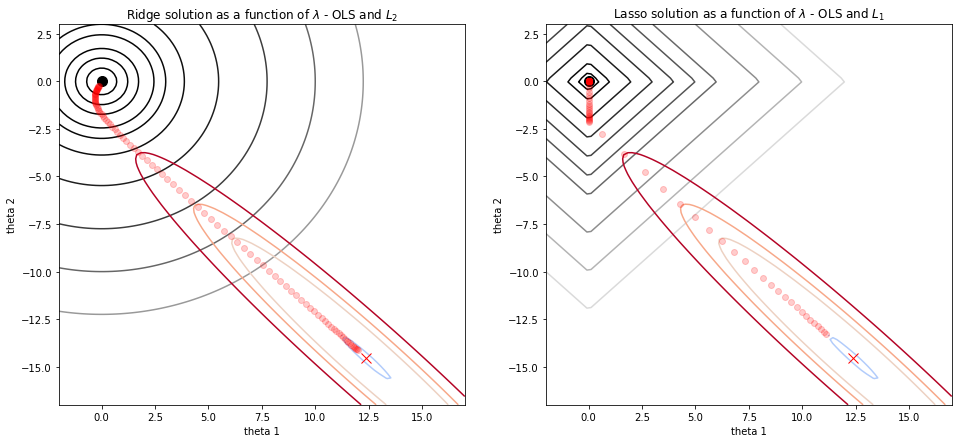

In [6]:
# Meshgrid of theta values

xx, yy = np.meshgrid(np.linspace(-2, 17, 100), np.linspace(-17, 3, 100))

# Compute arrays of cost function values for each theta combination

zz_l2 = np.array([cost_l2(xi, yi) for xi, yi in zip(np.ravel(xx), np.ravel(yy))]) # L2

zz_l1 = np.array([cost_l1(xi, yi) for xi, yi in zip(np.ravel(xx), np.ravel(yy))]) # L1

zz_ols = np.array([cost_function(X, y_noise.reshape(-1,1), np.array([t0,t1]).reshape(-1,1)) 
                   for t0, t1 in zip(np.ravel(xx), np.ravel(yy))]) # OLS

# Reshape arrays of cost function values

Z_l1 = zz_l1.reshape(xx.shape)
Z_l2 = zz_l2.reshape(xx.shape)
Z_ols = zz_ols.reshape(xx.shape)

# Define global minimum of each function

min_l2 = np.array([0., 0.])
min_l1 = np.array([0., 0.])
min_ols = np.linalg.inv(X.T @ X) @ X.T @ y_noise

# Contour plot L2
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 7))

ax1.contour(xx, yy, Z_l2, levels = [0.5, 1.5, 3, 6, 9, 15, 30, 60, 100, 150, 250], cmap='gist_gray') # L2
ax1.contour(xx, yy, Z_ols, levels = [0.01, 0.06, 0.09, 0.11, 0.15], cmap='coolwarm') # OLS
ax1.set_xlabel('theta 1')
ax1.set_ylabel('theta 2')
ax1.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$')

# Plot minimum
ax1.plot(min_ols[0], min_ols[1], marker='x', color='red', markersize=10) # OLS minimum
ax1.plot(min_l2[0], min_l2[1], marker='o', color='black', markersize=10) # L2 minimum

# Plot path of theta as function of lambda
ax1.plot(theta_0_list_reg_l2, theta_1_list_reg_l2,
         linestyle='none', marker='o',
         color='red', alpha=0.2)


# Contour plot L1
ax2.contour(xx, yy, Z_l1, [0.5, 1, 2, 3, 4, 5, 6, 8, 10, 12, 14],  cmap='gist_gray') # L1
ax2.contour(xx, yy, Z_ols, levels=[0.01, 0.06, 0.09, 0.11, 0.15], cmap='coolwarm') # OLS
ax2.set_xlabel('theta 1')
ax2.set_ylabel('theta 2')
ax2.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$')

# Plot minimum
ax2.plot(min_ols[0], min_ols[1], marker='x', color='red', markersize=10) # OLS minimum
ax2.plot(min_l1[0], min_l1[1], marker='o', color='black', markersize=10) # L2 minimum

# Plot path of theta as function of lambda
ax2.plot(theta_0_list_reg_l1, theta_1_list_reg_l1,
         linestyle='none', marker='o',
         color='red', alpha=0.2)